# Project 3

## Brian Livian, Eli Amsellem, Mazal- Tov Amsellem

# Part 1: Data Loading

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load data from github repository
data = pd.read_csv('https://raw.githubusercontent.com/brianlivian/AIM-5001/master/M10_Data.csv')
# Name columns
data.columns = ['Symboling', 'Normalized Losses', 'Make', 'Fuel Type', 'Aspiration', 'Num of Doors', 'Body Style', 'Drive Wheels', 'Engine Location','Wheel Base', 'Length', 'Width', 'Height', 'Curb Weight', 'Engine Type', 'Num of Cylinders', 'Engine Size', 'Fuel System', 'Bore', 'Stroke', 'Compression Ratio', 'Horsepower', 'Peak RPM', 'City MPG', 'Highway MPG', 'Price']
# Display all columnsaAA
pd.set_option('max_columns', None)
data

,Symboling,Normalized Losses,Make,Fuel Type,Aspiration,Num of Doors,Body Style,Drive Wheels,Engine Location,Wheel Base,Length,Width,Height,Curb Weight,Engine Type,Num of Cylinders,Engine Size,Fuel System,Bore,Stroke,Compression Ratio,Horsepower,Peak RPM,City MPG,Highway MPG,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


# Part 2: EDA

### Introduction

The cars dataset was retrieved from the UCI machine learning repository. It includes data for 204 cars, each with 24 attributes. The attributes include: 'Symboling', 'Normalized Losses', 'Make', 'Fuel Type', 'Aspiration', 'Num of Doors', 'Body Style', 'Drive Wheels', 'Engine Location','Wheel Base', 'Length', 'Width', 'Height', 'Curb Weight', 'Engine Type', 'Num of Cylinders', 'Engine Size', 'Fuel System', 'Bore', 'Stroke', 'Compression Ratio', 'Horsepower', 'Peak RPM', 'City MPG', 'Highway MPG', 'Price'.

https://archive.ics.uci.edu/ml/datasets/Automobile


### Summary

Below is a summary of the datatypes each attribute in the dataset. Note that some attributes are labeled as object where they should be numeric. This is due to missing data which is denoted as '?'. We handle this problem in the necesseary attributes by converting each '?' to a np.nan, then converting the string objects to numeric values.

In [4]:
data.dtypes

Symboling              int64
Normalized Losses     object
Make                  object
Fuel Type             object
Aspiration            object
Num of Doors          object
Body Style            object
Drive Wheels          object
Engine Location       object
Wheel Base           float64
Length               float64
Width                float64
Height               float64
Curb Weight            int64
Engine Type           object
Num of Cylinders      object
Engine Size            int64
Fuel System           object
Bore                  object
Stroke                object
Compression Ratio    float64
Horsepower            object
Peak RPM              object
City MPG               int64
Highway MPG            int64
Price                 object
dtype: object

### Correlation

We generate the coorelation between each of the attributes.

In [5]:
data.corr()

,Symboling,Wheel Base,Length,Width,Height,Curb Weight,Engine Size,Compression Ratio,City MPG,Highway MPG
Symboling,1.000000,-0.525095,-0.356792,-0.227799,-0.533078,-0.229281,-0.107229,-0.177413,-0.030557,0.039598
Wheel Base,-0.525095,1.000000,0.877612,0.795115,0.582603,0.781763,0.573989,0.249199,-0.479633,-0.552897
Length,-0.356792,0.877612,1.000000,0.841199,0.491969,0.878090,0.683830,0.157913,-0.673251,-0.706635
Width,-0.227799,0.795115,0.841199,1.000000,0.274075,0.868493,0.737042,0.180287,-0.647177,-0.681169
Height,-0.533078,0.582603,0.491969,0.274075,1.000000,0.298429,0.068577,0.261036,-0.055659,-0.113995
Curb Weight,-0.229281,0.781763,0.878090,0.868493,0.298429,1.000000,0.850611,0.151372,-0.758238,-0.798088
Engine Size,-0.107229,0.573989,0.683830,0.737042,0.068577,0.850611,1.000000,0.029083,-0.654101,-0.677775
Compression Ratio,-0.177413,0.249199,0.157913,0.180287,0.261036,0.151372,0.029083,1.000000,0.324186,0.264677
City MPG,-0.030557,-0.479633,-0.673251,-0.647177,-0.055659,-0.758238,-0.654101,0.324186,1.000000,0.971311
Highway MPG,0.039598,-0.552897,-0.706635,-0.681169,-0.113995,-0.798088,-0.677775,0.264677,0.971311,1.000000


### Pairplot

We generate a pairplot to identify any interesting relationships between attributes, which we explore further in the cells below.

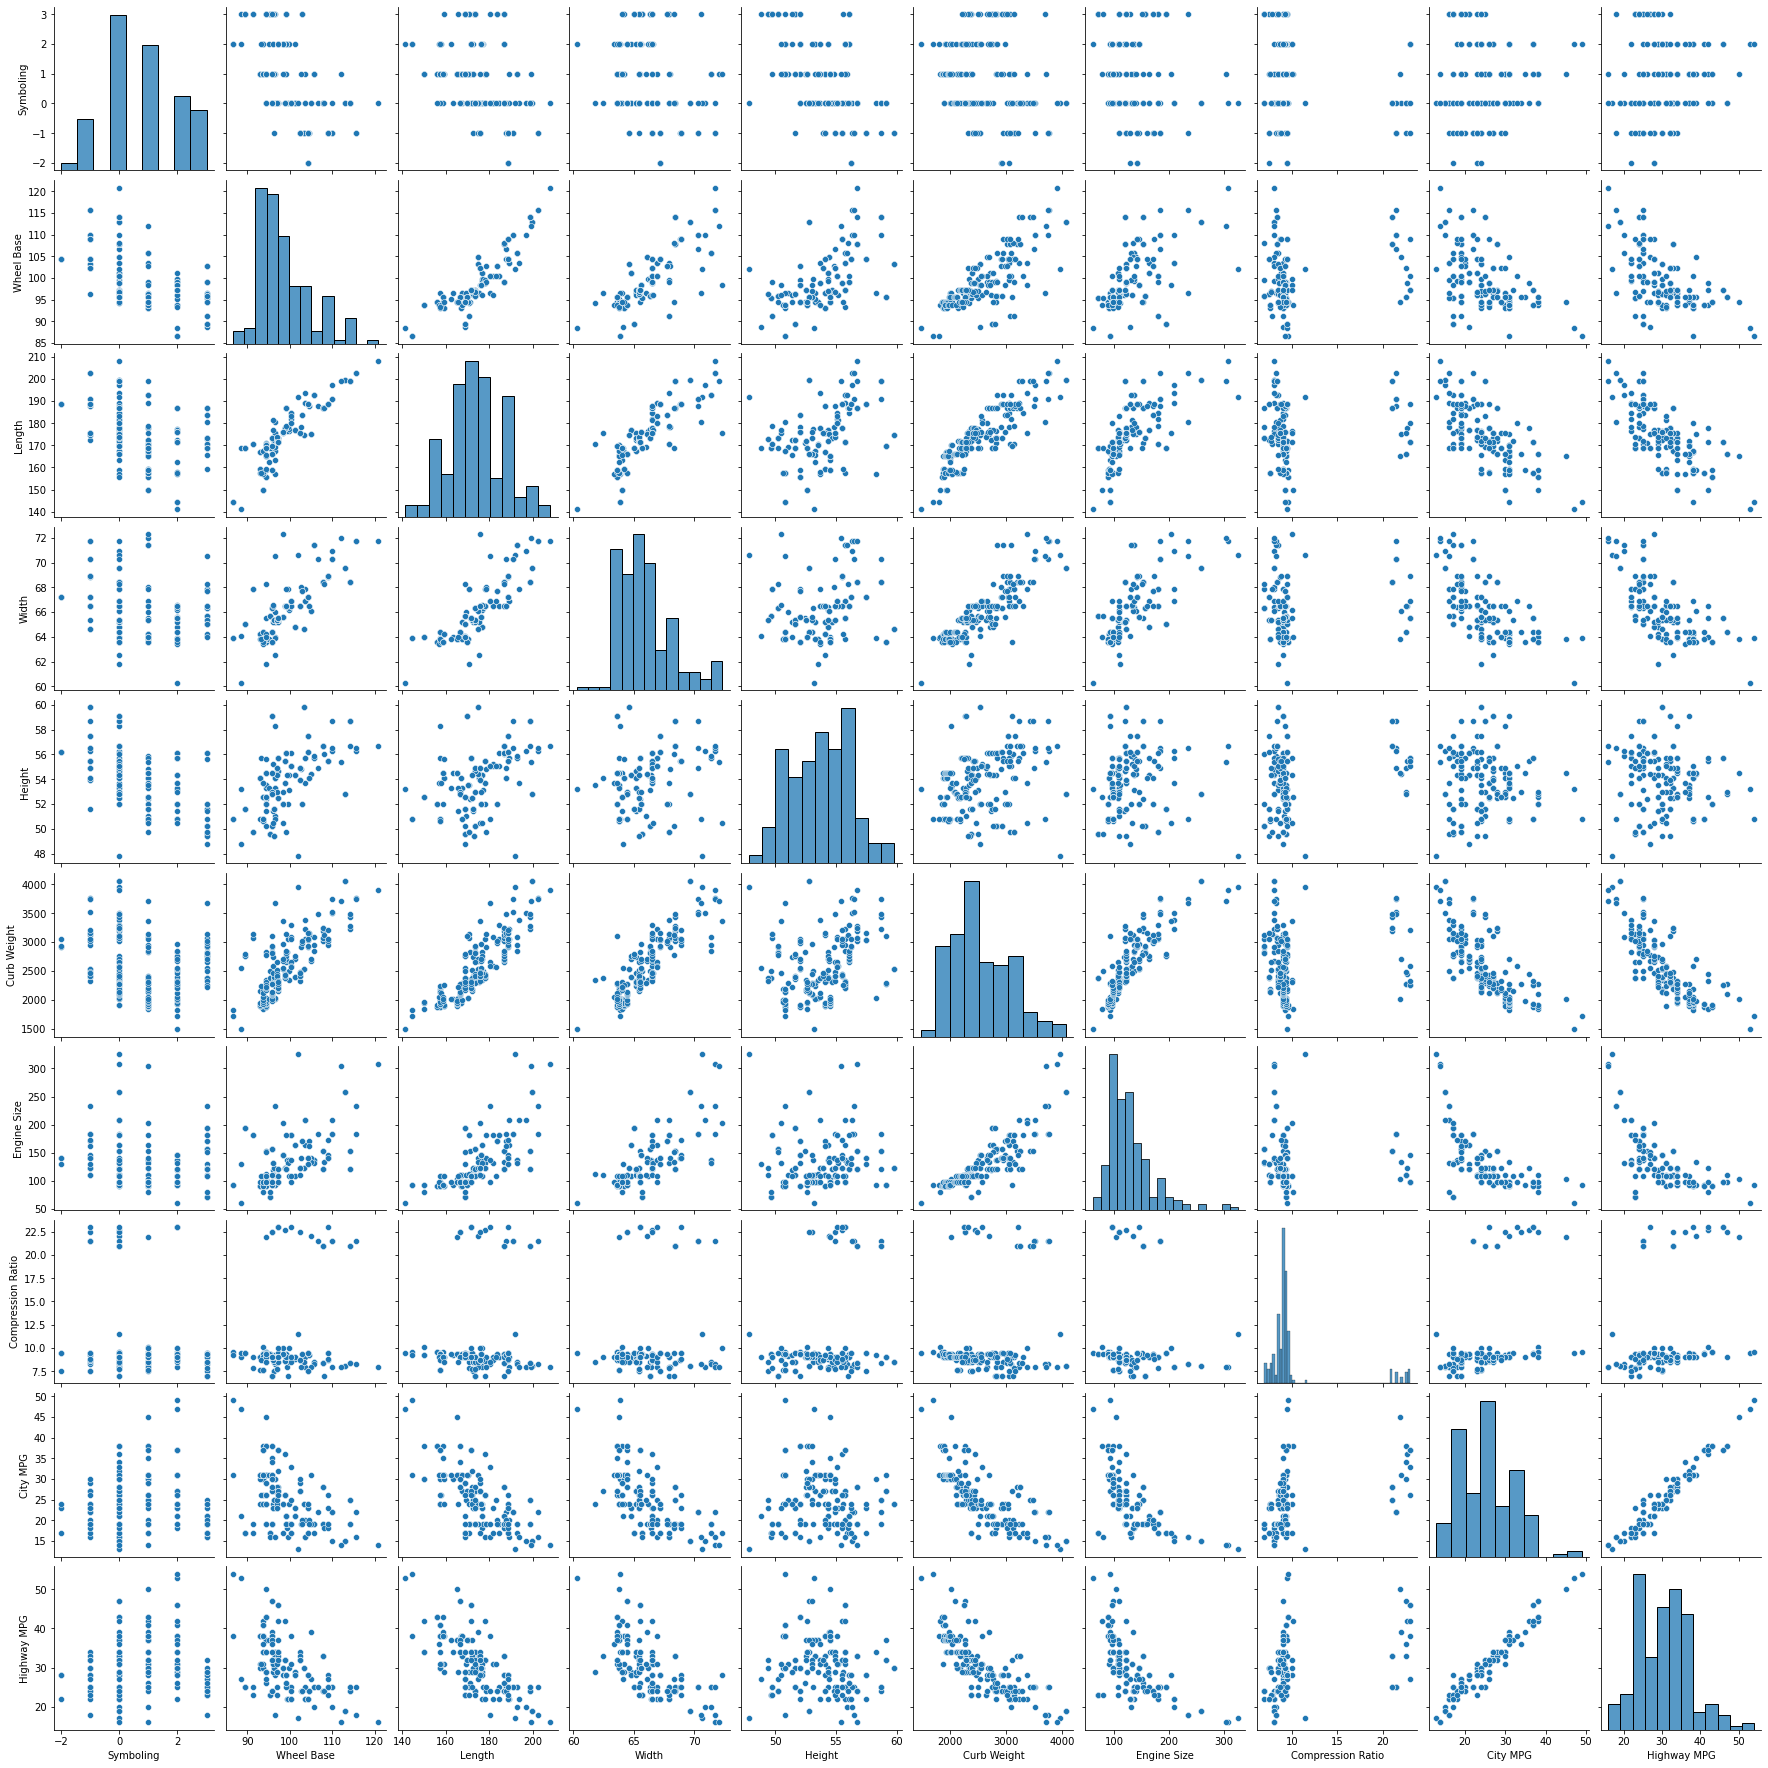

In [6]:
sns.pairplot(data)

### 1. Symboling

Symboling is stored as an integer in this dataset. However, we will treat it as a categorical variable. This dataset provides symboling values of: -3, -2, -1, 0, 1, 2, 3. There is no missing data in this attribute.

As seen in the bar graph below, the most popular symboling is 0 with 67 cars, while the least popular is -2 with  cars. 

 0    67
 1    54
 2    32
 3    26
-1    22
-2     3
Name: Symboling, dtype: int64


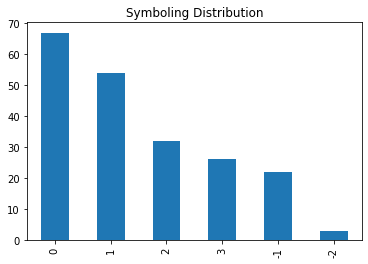

In [7]:
# Print value counts
print(data['Symboling'].value_counts())

# Bar graph for symboling distrubtion
data['Symboling'].value_counts().plot.bar()
plt.title('Symboling Distribution')
plt.show()

### 2. Normalized Losses

Normalized losses is a discrete numeric data type on the range [65,256]. There are 4 missing data points in this attribute.

The graphs below show the distribtion of normalized losses. The median is 115, with a skew right distribution.

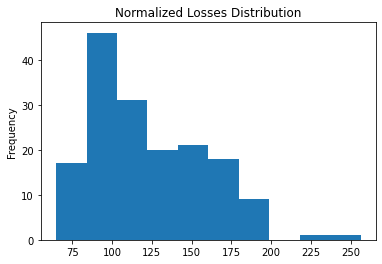

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


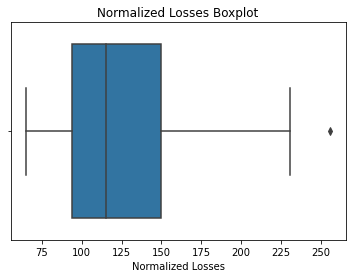

The mean of Normalized Losses is 122.0
The median of Normalized Losses is 115.0
The standard deviation of Normalized Losses is 35.442167530553256
There are 40 NaN values in this attribute.


In [10]:
#Replace '?'s of Normalized Losses to np.nan
#data.replace({'Normalized Losses': {'?': np.nan}}, regex=False,inplace=True)

# Convert from string to numeric
#data['Normalized Losses'] = pd.to_numeric(data['Normalized Losses'])

# Create histogram for normalized losses distribution
data['Normalized Losses'].plot.hist()
plt.title("Normalized Losses Distribution")
plt.show()

# Create boxplot for normalized losses distribution
sns.boxplot(data['Normalized Losses'])
plt.title('Normalized Losses Boxplot')
plt.show()

print('The mean of Normalized Losses is ' + str(data['Normalized Losses'].mean()))
print('The median of Normalized Losses is ' + str(data['Normalized Losses'].median()))
print('The standard deviation of Normalized Losses is ' + str(data['Normalized Losses'].std()))

print('There are ' + str(data['Normalized Losses'].isna().sum()) + ' NaN values in this attribute.')

### 3. Make

The makes listed in this dataset include: alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo.

The matplotlib graph below shows the distribution of the makes of cars in this dataset. Toyota is the most common make, while mercury is the least common. There is no missing data in this attribute.

The seaborn graph shows the relationship between car price vs make. Jaguar is the most expensive make, while chevrolet is the least exepensive.

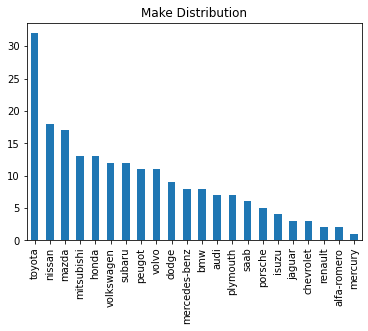

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
renault           2
alfa-romero       2
mercury           1
Name: Make, dtype: int64
204


C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Price vs Make')

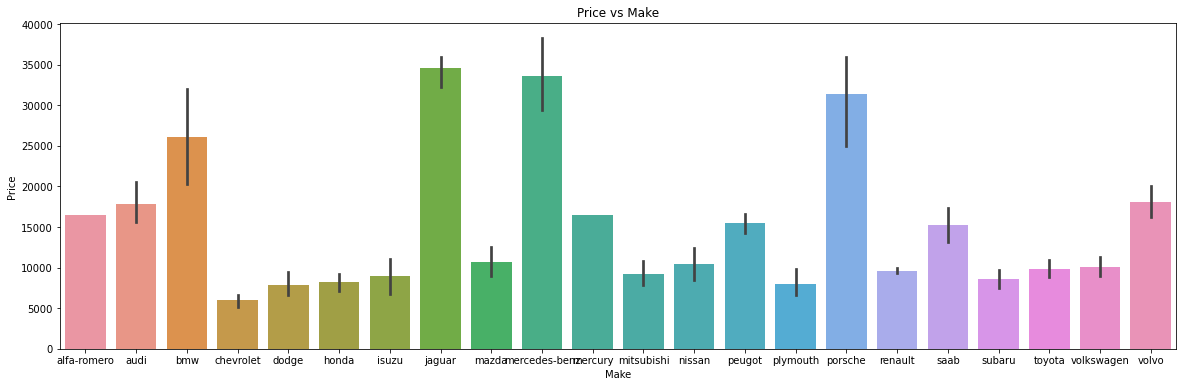

In [54]:
plt.subplot(111)
# Bar plot of make distribution
data['Make'].value_counts().plot.bar()
plt.title('Make Distribution')
plt.show()
print(data['Make'].value_counts())
print(data['Make'].value_counts().sum())


#Replace '?'s in Price to np.nan
#data.replace({'Price': {'?': np.nan}}, regex=False,inplace=True)
#Convert 'Price' data from string to float
#data['Price'] = pd.to_numeric(data['Price'])

# Seaborn bargraph for price vs make
plt.figure(figsize=(20, 6))
sns.barplot(data['Make'], data['Price'])
plt.title('Price vs Make')


### 4. Fuel Type

The fuel types included in this dataset are diesel and gas. There is no missing data in this attribute.

The matplotlib bar graph below shows the distribution of gas and diesel cars. The ratio of gas to diesel cars is about 9:1.

The seaborn bar graph shows the relationship of city mileage to fuel type. Based off this analysis, diesel cars are more fuel efficient gas cars.

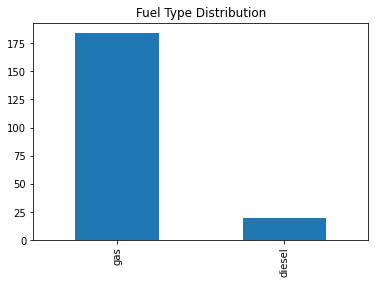

gas       184
diesel     20
Name: Fuel Type, dtype: int64


C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


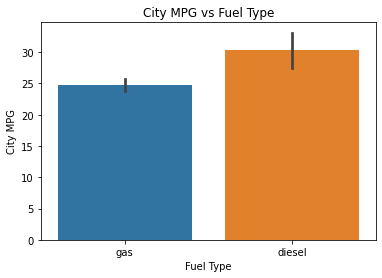

In [18]:
# Bar graph for fuel type distribution
data['Fuel Type'].value_counts().plot.bar()
plt.title('Fuel Type Distribution')
plt.show()

print(data['Fuel Type'].value_counts())

# Seaborn barplot for city mpg to fuel type
sns.barplot(data['Fuel Type'], data['City MPG'])
plt.title('City MPG vs Fuel Type')
plt.show()


### 5. Aspiration

The aspiration of a car describes the type of air intake of the engine. This dataset includes data for cars with standard and turbo aspiration. There is no missing data in this attribute.

The matplotlib bar graph below shows the distribution of standard vs turbo aspirated cars. There is about a 9:2 ratio between standard and turbo cars. 

The seaborn graph below shows the relationship between aspiration and city mileage. Based off this analysis, standard car aspirations are more fuel efficient thatn turbo aspiration.

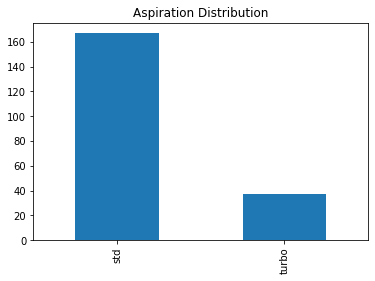

std      167
turbo     37
Name: Aspiration, dtype: int64


C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


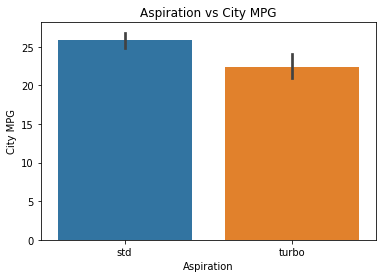

In [19]:
# Bar plot of aspiration distribution
data['Aspiration'].value_counts().plot.bar()
plt.title('Aspiration Distribution')
plt.show()

print(data['Aspiration'].value_counts())

# Seaborn barplot for city mpg vs aspiration type
sns.barplot(data['Aspiration'], data['City MPG'])
plt.title('Aspiration vs City MPG')
plt.show()

### 6. Number of Doors

The number of doors attribute of this dataset includes data for 2 door and 4 door cars.  There are 2 missing values for the attribute of number of doors.

Based of the barplot below, there are more four door cars than two door. There are 114 four door cars, and 88 two door cars.

four    114
two      88
?         2
Name: Num of Doors, dtype: int64


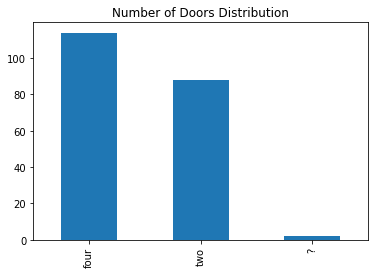

In [5]:
# Distribution of number of doors
data['Num of Doors'].value_counts().plot.bar()
plt.title('Number of Doors Distribution')
print(data['Num of Doors'].value_counts())

### 7. Body Style

This data set describes the attribute of body style. There are 5 body styles in this dataset: hardtop, wagon, sedan, hatchback, convertible.  There is no missing data in this attribute.

The bar graph below shows the distrubtion between all types of body styles. The most popular body style is sedan, the least popular is convertible.

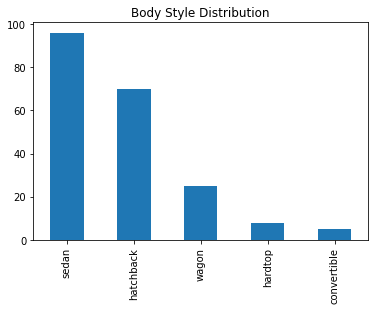

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     5
Name: Body Style, dtype: int64


In [20]:
# Bar graph for body style distribution
data['Body Style'].value_counts().plot.bar()
plt.title('Body Style Distribution')
plt.show()
print(data['Body Style'].value_counts())

### 8. Drive Wheels

The wheel drive attribute describes how power is sent to the whees of the car. This dataset has includes 3 types of drive wheels: 4 wheel drive, front wheel drive, and rear wheel drive. There is no missing data in this attribute.

The bar graph below shows the distribution of the 3 types of drive wheels included in this dataset. The most popular drive wheel type is fwd, while the least popular is 4wd.

fwd    120
rwd     75
4wd      9
Name: Drive Wheels, dtype: int64


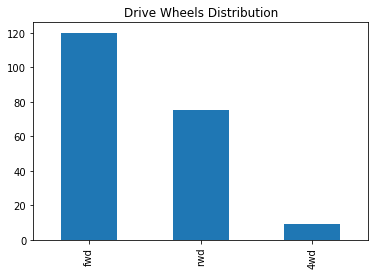

In [220]:
data['Drive Wheels'].value_counts().plot.bar()
plt.title("Drive Wheels Distribution")
print(data['Drive Wheels'].value_counts())

### 9. Engine Location

The engine location of a car describes where in the car the engine sits. This data set has 2 possibilites for engine location: front and rear.  There is no missing data in this attribute.

The bar graph below shows the distribution of the 2 engine locations described in this dataset. Front located engines are more popular than rear located ones, with 201 front located engines and 3 rear located. 

front    201
rear       3
Name: Engine Location, dtype: int64


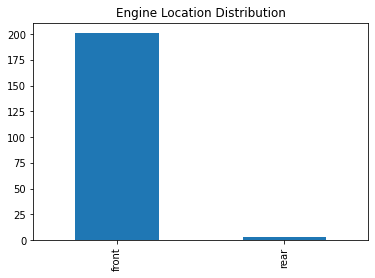

In [21]:
# Bar plot for engine location distribution
data['Engine Location'].value_counts().plot.bar()
plt.title('Engine Location Distribution')
print(data['Engine Location'].value_counts())

### 10. Wheel Base

The wheel base of a car describes the distance between the center of the front wheel to the center of the rear wheel. This dataset describes wheel base in inches, and has a continuous range of [86.8, 120.9]. There is no missing data in this attribute.

Below is a histogram of the distribution of wheel base. In addition, statistics on mean, median and standard deviation are shown. A boxplot of the data is show as well. The median of the distribution is 97.0. This distribution is skew right. 

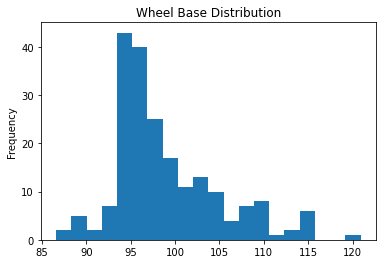

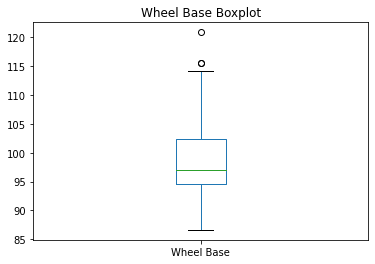

The mean of wheel base is 98.80637254901971
The median of wheel base is 97.0
The standard deviation of wheel base is 5.994143987779894
There are 0 NaN values in this attribute.


In [23]:
# Wheel base distribution histogram
data['Wheel Base'].plot.hist(bins = 20)
plt.title('Wheel Base Distribution')
plt.show()

# Boxplot of wheel base distribution
data['Wheel Base'].plot.box()
plt.title('Wheel Base Boxplot')
plt.show()

print('The mean of wheel base is ' + str(data['Wheel Base'].mean()))
print('The median of wheel base is ' + str(data['Wheel Base'].median()))
print('The standard deviation of wheel base is ' + str(data['Wheel Base'].std()))

print('There are ' + str(data['Wheel Base'].isna().sum()) + ' NaN values in this attribute.')



### 11. Length

The length attribute describes the length of the car from bumper to bumper. This dataset has lenghts of cars ranging from 141.1 - 208.1 inches.  There is no missing data in this attribute.

Below shows the histogram and boxplot for length. The mean, median and standard deviation are also shown. The distribtuion is not skewed.

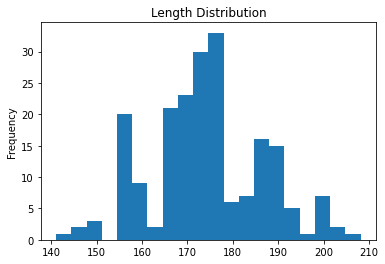

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


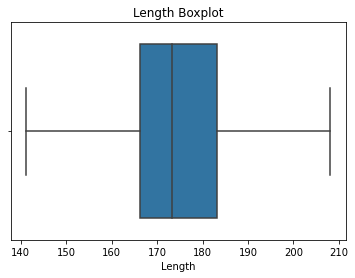

The mean of length is 174.07500000000013
The median of length is 173.2
The standard deviation of length is 12.362122846857176
There are 0 NaN values in this attribute.


In [24]:
# Histogram for length distribution
data['Length'].plot.hist(bins = 20)
plt.title('Length Distribution')
plt.show()

# Boxplot for length distribution
sns.boxplot(data['Length'])
plt.title('Length Boxplot')
plt.show()

print('The mean of length is ' + str(data['Length'].mean()))
print('The median of length is ' + str(data['Length'].median()))
print('The standard deviation of length is ' + str(data['Length'].std()))

print('There are ' + str(data['Length'].isna().sum()) + ' NaN values in this attribute.')


### 12. Width

The width of the car describes the width from door to door at its widest point. This dataset describes width in inches, with a range of [60.3, 72.3]. There is no missing data in this attribute

The distribtion of width has a median of 65.5, the distribtion is not skewed.

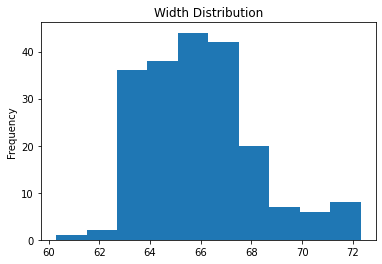

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


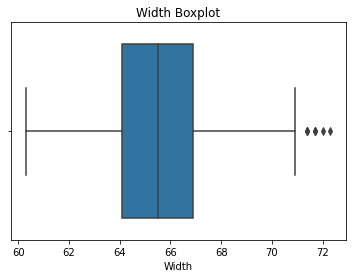

The mean of width is 65.91666666666664
The median of width is 65.5
The standard deviation of width is 2.1467162841413643
There are 0 NaN values in this attribute.


In [25]:
# Distribtuion of width histogram
data['Width'].plot.hist()
plt.title('Width Distribution')
plt.show()

# Distribution of width boxplot
sns.boxplot(data['Width'])
plt.title('Width Boxplot')
plt.show()

print('The mean of width is ' + str(data['Width'].mean()))
print('The median of width is ' + str(data['Width'].median()))
print('The standard deviation of width is ' + str(data['Width'].std()))
print('There are ' + str(data['Width'].isna().sum()) + ' NaN values in this attribute.')

### 13. Height

The height in this dataset describes the height of each car from ground to its highest point. It is measured in inches, with a continuous range of [47.8, 56.8]. There is no missing data in this attribute.

The distribution of height has a median of 54.1, the distribution is not skewed.

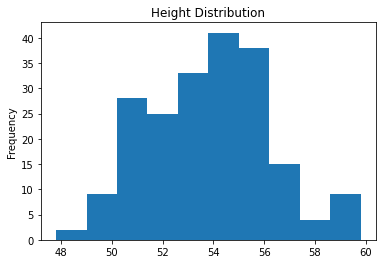

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


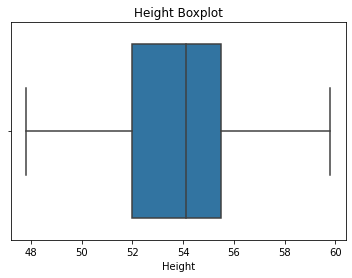

The mean of height is 53.74901960784318
The median of height is 54.1
The standard deviation of height is 2.4249014036343053
There are 0 NaN values in this attribute.


In [26]:
# Distribtion of height histogram
data['Height'].plot.hist()
plt.title('Height Distribution')
plt.show()

# Distribution of height boxplot
sns.boxplot(data['Height'])
plt.title('Height Boxplot')
plt.show()

print('The mean of height is ' + str(data['Height'].mean()))
print('The median of height is ' + str(data['Height'].median()))
print('The standard deviation of height is ' + str(data['Height'].std()))
print('There are ' + str(data['Height'].isna().sum()) + ' NaN values in this attribute.')

### 14. Curb Weight

The curb weight attribute of this data set describes the weight of each car in pounds. The range of this attribute is continuous from [1488, 4066]. There is no missing data in this attribute.

The distribution of curb weight has a median of 2414, the distribution is skew right.

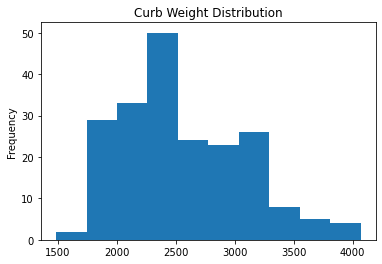

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


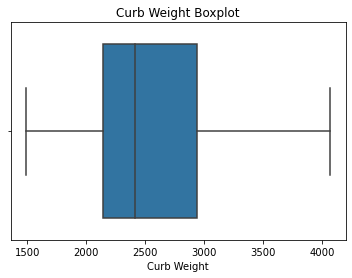

The mean of weight is 2555.6029411764707
The median of weight is 2414.0
The standard deviation of weight is 521.9608201055871
There are 0 NaN values in this attribute.


In [27]:
# Distribution of curb weight histogram
data['Curb Weight'].plot.hist()
plt.title('Curb Weight Distribution')
plt.show()

# Distribution of curb weight boxplot
sns.boxplot(data['Curb Weight'])
plt.title('Curb Weight Boxplot')
plt.show()

print('The mean of weight is ' + str(data['Curb Weight'].mean()))
print('The median of weight is ' + str(data['Curb Weight'].median()))
print('The standard deviation of weight is ' + str(data['Curb Weight'].std()))

print('There are ' + str(data['Curb Weight'].isna().sum()) + ' NaN values in this attribute.')

### 15. Engine Type

The engine type of a car describes how the engine is constructed. This dataset includes data for engine types of: dohc, dohcv, l, ohc, ohcf, ohcv, rotor. These stand for Dual overhead camshaft engine, Dual overhead camshaft V engine, Inline engine, Overhead camshaft engine, Overhead camshaft F engine, Overhead camshaft V engine, and Rotary engine respectively. There is no missing data for this attribute.

The bargraph below shows the distribution of engine types. The most popular engine type is ohc with 148 cars, and the least popular is dohcv with 1 car.

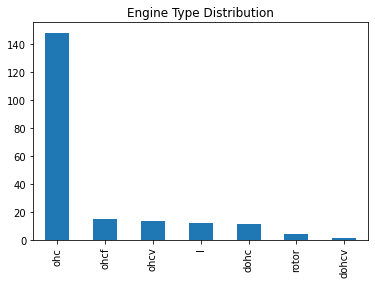

ohc      148
ohcf      15
ohcv      13
l         12
dohc      11
rotor      4
dohcv      1
Name: Engine Type, dtype: int64
204


In [28]:
# Engine type distribtion
data['Engine Type'].value_counts().plot.bar()
plt.title('Engine Type Distribution')
plt.show()

print(data['Engine Type'].value_counts())
print(data['Engine Type'].value_counts().sum())

### 17. Engine Size

Engine size describes the displacement of the engine. In this dataset it is measured in cubic inches, and is discrete numeric on the range [61, 326]. There is no missing data in this attribute.

The histogram and boxplot for engine size distribution are shown below. The median engine size is 119.5. The distribution is skew right.

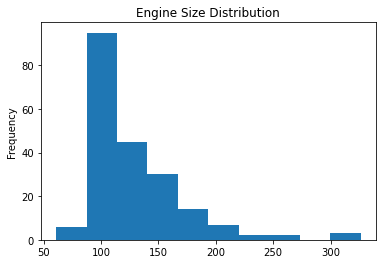

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


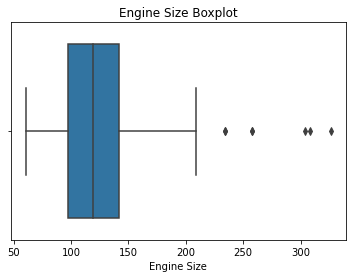

The mean of engine size is 126.8921568627451
The median of engine size is 119.5
The standard deviation of engine size is 41.74456853557809
There are 0 NaN values in this attribute.


In [29]:
# Engine size distribution histogram
data['Engine Size'].plot.hist()
plt.title('Engine Size Distribution')
plt.show()

# Engine size distribution boxplot
sns.boxplot(data['Engine Size'])
plt.title('Engine Size Boxplot')
plt.show()

print('The mean of engine size is ' + str(data['Engine Size'].mean()))
print('The median of engine size is ' + str(data['Engine Size'].median()))
print('The standard deviation of engine size is ' + str(data['Engine Size'].std()))

print('There are ' + str(data['Engine Size'].isna().sum()) + ' NaN values in this attribute.')

### 18. Fuel System

This datset has attributes for 8 fuel systems: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi. Bbl stands for 'barrel', it is the number of air holes that enter the engine. So, for example, 1bbl describes an engine with 1 air hole. Idi stands for indirect fuel injection. It utilizes a pre combustion chamber for diesel fueled engines. Mfpi stands for multi port fuel injection. Sfpi - sequential port fuel injection.  There is no missing data for this attribute

The bargraph belows shows the distrubtion of fuel types. Mpfi systems are most popular with 93 cars, while mfi and spfi are the least popular with 1 car each.

mpfi    93
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: Fuel System, dtype: int64
204


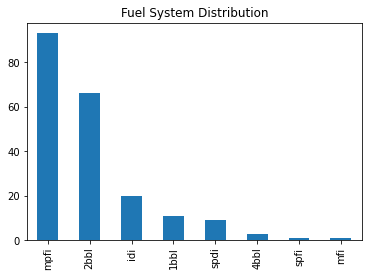

In [30]:
# Fuel system value counts bar plot
data['Fuel System'].value_counts().plot.bar()
plt.title('Fuel System Distribution')
print(data['Fuel System'].value_counts())
print(data['Fuel System'].value_counts().sum())

### 19. Bore

The bore is the diamater of the pistons in each cylinder. The data in this attribute is in inches, and is continuous from [2.54, 3.94]. There are 4 missing data points in this attribute.

The distrubtion for bore is shown below in a histogram and boxplot. The median bore size is 3.31. The distribution is not skewed.

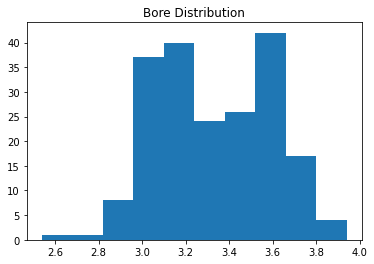

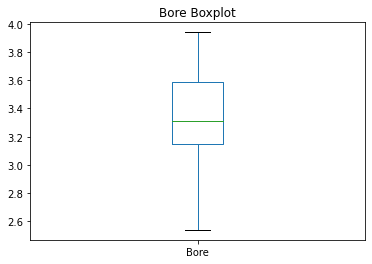

The mean of bore is 3.3290500000000014
The median of bore is 3.31
The standard deviation of bore is 0.2740439709060387
There are 4 NaN values in this attribute.


In [34]:
# Replace '?'of Bore to np.nan
#data.replace({'Bore': {'?': np.nan}}, regex=False,inplace=True)

# Convert 'Bore' data from string to float
#data['Bore'] = pd.to_numeric(data['Bore'])

plt.hist(data['Bore'])
plt.title('Bore Distribution')
plt.show()

data['Bore'].plot.box()
plt.title('Bore Boxplot')
plt.show()



print('The mean of bore is ' + str(data['Bore'].mean()))
print('The median of bore is ' + str(data['Bore'].median()))
print('The standard deviation of bore is ' + str(data['Bore'].std()))

print('There are ' + str(data['Bore'].isna().sum()) + ' NaN values in this attribute.')


### 20. Stroke

The stroke of an engine describes the distance travelled by the piston during each cycle. The stroke along with bore diameter determines the engine's displacement. Stroke in this dataset is measured in inches, and is continuous on [2.07, 4,17]. There are 4 missing data points in this attribute.

The histogram and boxplot below show the distribution of stroke. The median of stroke is 3.29. The distribution is slightly skew left.

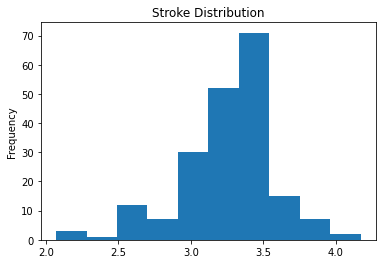

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


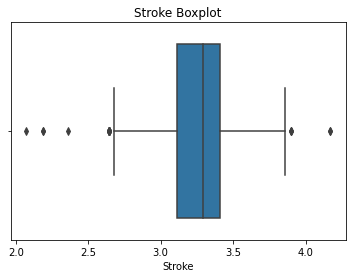

The mean of stroke is 3.258299999999994
The median of stroke is 3.29
The standard deviation of stroke is 0.31486793913556405
There are 4 NaN values in this attribute.


In [35]:
# Replace '?' of Stroke to np.nan
data.replace({'Stroke': {'?': np.nan}}, regex=False,inplace=True)

# Convert data from string to float
data['Stroke'] = pd.to_numeric(data['Stroke'])


data['Stroke'].plot.hist()
plt.title("Stroke Distribution")
plt.show()

sns.boxplot(data['Stroke'])
plt.title('Stroke Boxplot')
plt.show()

print('The mean of stroke is ' + str(data['Stroke'].mean()))
print('The median of stroke is ' + str(data['Stroke'].median()))
print('The standard deviation of stroke is ' + str(data['Stroke'].std()))

print('There are ' + str(data['Stroke'].isna().sum()) + ' NaN values in this attribute.')

### 21. Compression Ratio

Compression ratio of an engine is the ratio of volume when the cylinder is at the bottom of the chamber (pre combustion), to when the piston is at the top of the chamber (post combustion). The data on compression ratio is unitless and continuous on [7,23]. There is no missing data in this attribute.

The histogram and boxplot of compression ratio are shown below. The median of compression ratio is 9.0. The distribution is not skewed.

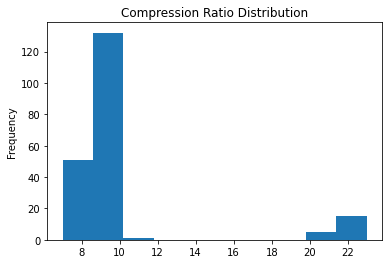

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


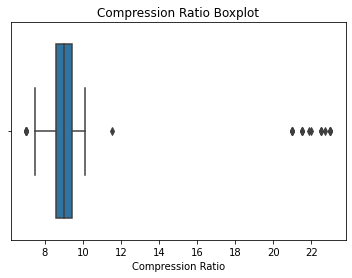

The mean of compression ratio is 10.148137254901963
The median of compression ratio is 9.0
The standard deviation of compression ratio is 3.981000129405844
There are 0 NaN values in this attribute.


In [36]:
# Compression ratio distibution histogram
data['Compression Ratio'].plot.hist()
plt.title('Compression Ratio Distribution')
plt.show()

# Compression ratio distribution boxplot
sns.boxplot(data['Compression Ratio'])
plt.title('Compression Ratio Boxplot')
plt.show()

print('The mean of compression ratio is ' + str(data['Compression Ratio'].mean()))
print('The median of compression ratio is ' + str(data['Compression Ratio'].median()))
print('The standard deviation of compression ratio is ' + str(data['Compression Ratio'].std()))

print('There are ' + str(data['Compression Ratio'].isna().sum()) + ' NaN values in this attribute.')

### 22. Horsepower

Horsepower is unit of power of the engine. 1 hp = 745.7 watts. Horsepower in this dataset is discrete numeric on [48, 288]. There are 2 missing data points in this attribute.

The distribution of horsepower is shown in the histogram and boxplot below. The median horsepower is 95. The distribution is not skewed. 

The seaborn scatterplots below show the relationship between horsepower and mileage. For city and highway MPG, as horsepower increases, mileage decreases.

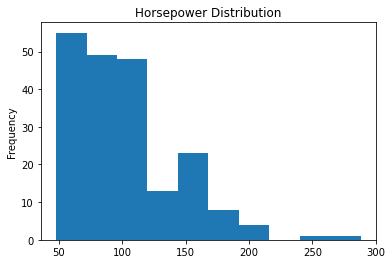

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


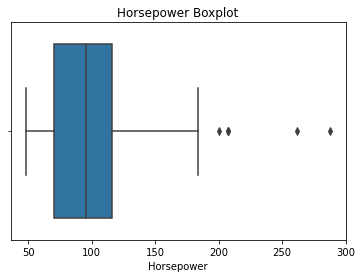

The mean of horsepower is 104.22277227722772
The median of horsepower is 95.0
The standard deviation of horsepower is 39.810182405033196
There are 2 NaN values in this attribute.


C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Highway MPG vs Horsepower')

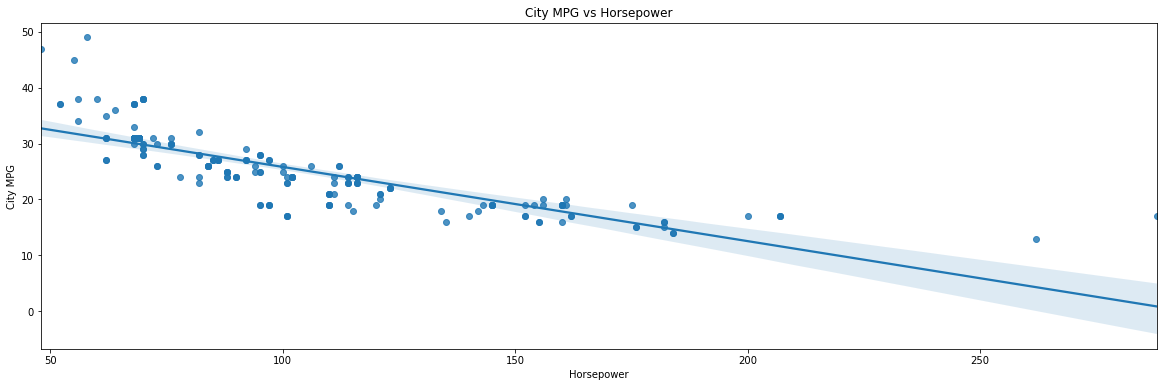

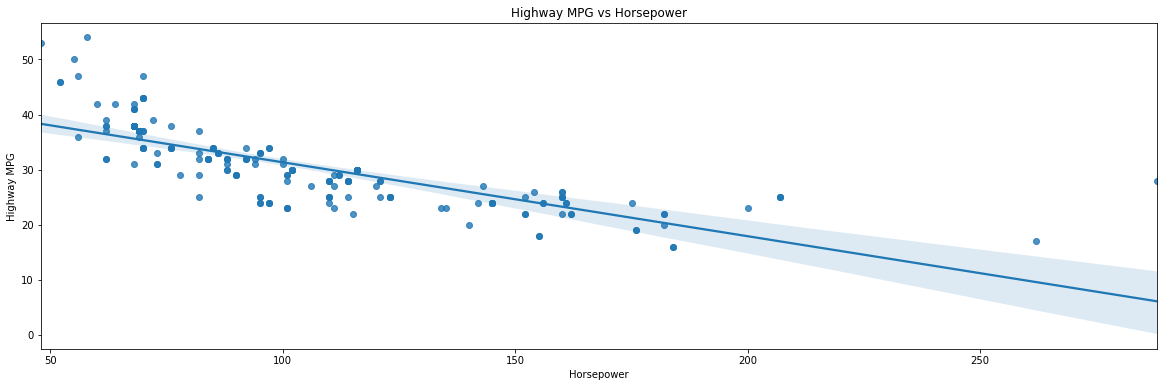

In [44]:
# Replace '?' of Horsepower to np.nan
#data.replace({'Horsepower': {'?': np.nan}}, regex=False,inplace=True)

# Convert 'Horsepower' data from string to float
#data['Horsepower'] = pd.to_numeric(data['Horsepower'])

# Horsepower histogram distribution
hp_distribution1 = data['Horsepower'].plot.hist()
hp_distribution1
plt.title('Horsepower Distribution')
plt.show()

# Horsepower boxplot distribution
hp_boxplot1 = sns.boxplot(data['Horsepower'])
hp_distribution1
plt.title('Horsepower Boxplot')
plt.show()

hp_mean1 = data['Horsepower'].mean()
hp_median1 = data['Horsepower'].median()
hp_std1 = data['Horsepower'].std()

print('The mean of horsepower is ' + str(hp_mean1))
print('The median of horsepower is ' + str(hp_median1))
print('The standard deviation of horsepower is ' + str(hp_std1))

print('There are ' + str(data['Horsepower'].isna().sum()) + ' NaN values in this attribute.')

# Seaborn bargraph for city mpg vs horsepower
plt.figure(figsize=(20, 6))
sns.regplot(data['Horsepower'], data['City MPG'])
plt.title('City MPG vs Horsepower')

# Seaborn bargraph for highway mpg vs horsepower
plt.figure(figsize=(20, 6))
sns.regplot(data['Horsepower'], data['Highway MPG'])
plt.title('Highway MPG vs Horsepower')


### 23. Peak rpm

Rpm stands for revolution for minute. In cars, rpm measures how many times the engines crankshaft makes a full rotation every mintute. It also measures how many times the engine's pistons go up and down in 1 minute. Rpm in this dataset is discrete numeric on [4150, 6600]. There are 2 missing data points in this attribute.

The histogram and boxplot below show the distribution of peak rpm. The median peak rpm is 5200. The distribution is not skewed.

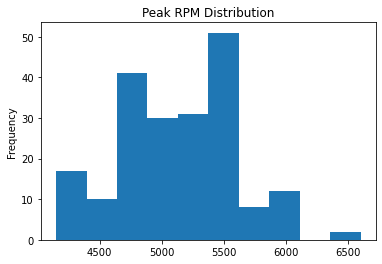

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


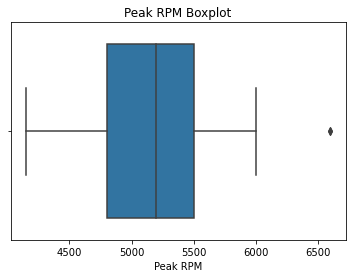

The mean of peak rpm is 5125.990099009901
The median of peak rpm is 5200.0
The standard deviation of peak rpm is 480.4436795866053
There are 2 NaN values in this attribute.


In [45]:
# Replace '?' of Peak RPM to np.nan
data.replace({'Peak RPM': {'?': np.nan}}, regex=False,inplace=True)
# Convert 'Peak RPM' data from string to float
data['Peak RPM'] = pd.to_numeric(data['Peak RPM'])

# Peak rpm distribution histogram
data['Peak RPM'].plot.hist()
plt.title('Peak RPM Distribution')
plt.show()

# Peak rpm distribution boxplot
sns.boxplot(data['Peak RPM'])
plt.title('Peak RPM Boxplot')
plt.show()

print('The mean of peak rpm is ' + str(data['Peak RPM'].mean()))
print('The median of peak rpm is ' + str(data['Peak RPM'].median()))
print('The standard deviation of peak rpm is ' + str(data['Peak RPM'].std()))

print('There are ' + str(data['Peak RPM'].isna().sum()) + ' NaN values in this attribute.')

### 24. City MPG

This attribute describes the miles per gallon of each car in the city. It is discrete numeric on [13, 49] MPG. There is no missing data in this attribute.

The histogram and boxplot below show the distribution of city mpg. The distribution has a median of 24.0. The distribution is not skewed.

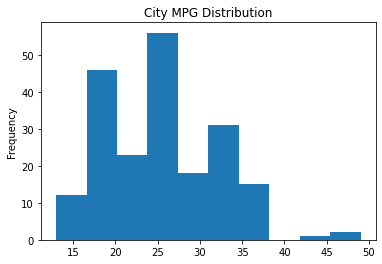

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


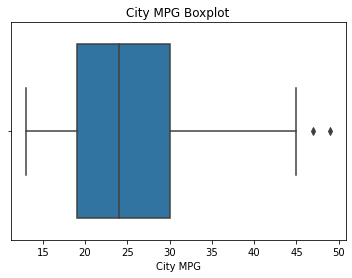

The mean of City MPG is 25.24019607843137
The median of City MPG is 24.0
The standard deviation of City MPG is 6.5515125889174035
There are 0 NaN values in this attribute.


In [46]:
# City mpg distribution histogram
data['City MPG'].plot.hist()
plt.title('City MPG Distribution')
plt.show()

# City mpg distribution boxplot
sns.boxplot(data['City MPG'])
plt.title('City MPG Boxplot')
plt.show()

print('The mean of City MPG is ' + str(data['City MPG'].mean()))
print('The median of City MPG is ' + str(data['City MPG'].median()))
print('The standard deviation of City MPG is ' + str(data['City MPG'].std()))

print('There are ' + str(data['City MPG'].isna().sum()) + ' NaN values in this attribute.')

### 25. Highway MPG

This attribute describes the miles per gallon of each car on the highway. It is discrete numeric on [15, 54] MPG. There is no missing data in this attribute.

The histogram and boxplot below show the distribution of highway mpg. The distribution has a median of 30.0. The distribution is not skewed.

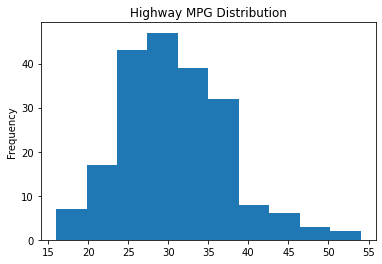

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


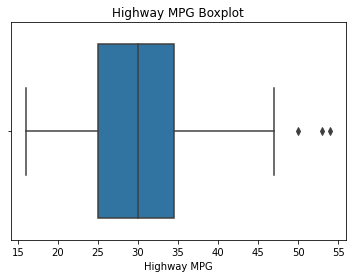

The mean of Highway MPG is 30.769607843137255
The median of Highway MPG is 30.0
The standard deviation of Highway MPG is 6.898336905530506
There are 0 NaN values in this attribute.


In [293]:
data['Highway MPG'].plot.hist()
plt.title('Highway MPG Distribution')
plt.show()

sns.boxplot(data['Highway MPG'])
plt.title('Highway MPG Boxplot')
plt.show()

print('The mean of Highway MPG is ' + str(data['Highway MPG'].mean()))
print('The median of Highway MPG is ' + str(data['Highway MPG'].median()))
print('The standard deviation of Highway MPG is ' + str(data['Highway MPG'].std()))

print('There are ' + str(data['Highway MPG'].isna().sum()) + ' NaN values in this attribute.')

### 26. Price

Price in this dataset is discrete numeric on [5118, 45400]. There are 4 missing data points in this attribute.

The histogram and boxplot below show the distribution of price. The distribution has a median of 10270. The distribution is skew right.

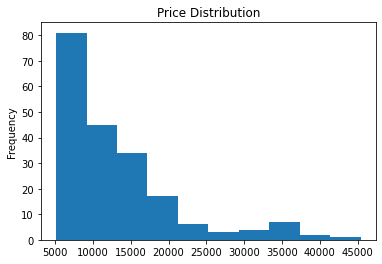

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


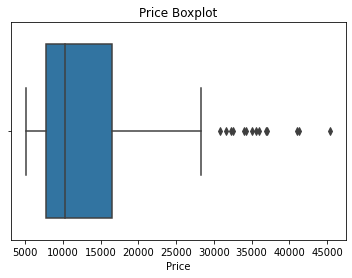

The mean of Price is 13205.69
The median of Price is 10270.0
The standard deviation of Price is 7966.982557988724
There are 4 NaN values in this attribute.


In [48]:
#Replace '?'s in Price to np.nan
#data.replace({'Price': {'?': np.nan}}, regex=False,inplace=True)
# Convert 'Price' data from string to float
#data['Price'] = pd.to_numeric(data['Price'])

# Price distribution histogram
data['Price'].plot.hist()
plt.title('Price Distribution')
plt.show()

# Price distribution boxplot
sns.boxplot(data['Price'])
plt.title('Price Boxplot')
plt.show()

print('The mean of Price is ' + str(data['Price'].mean()))
print('The median of Price is ' + str(data['Price'].median()))
print('The standard deviation of Price is ' + str(data['Price'].std()))

print('There are ' + str(data['Price'].isna().sum()) + ' NaN values in this attribute.')

# Part 3: Data Preparation and Feature Engineering

1. There are 13 numeric attributes in this dataset that can use feature scaling to shape them for ML algorithms: Normalized Losses, Wheel Base, Length, Width, Height, Curb Weight, Engine Size, Bore, Stroke, Horsepower, Peak RPM, City, MPG, Highway MPG, and Price. Machine learning algorithms can be applied to variables without normalized distributions but many perform better with normalized data. Therefore, all of these attributes require some sort of feature scaling method. Each attribute has a different distribution some approximate a Gaussian distribution while others are far off. I would suggest normalizing Normalized Losses, Curb Weight, Engine Size, Bore, Horsepower, Peak RPM, City MPG, and price. All other attributes are more suitable for standardization given their approximately normal distribution.

2. As stated in the EDA, Number of Doors contains 2 missing data values, while price contains 4 missing values. We are given that it is inappropriate to use mean, median or mode values as a substitue for these missing values. Doing this might create an unwanted bias in the dataset (a change in pdf). Instead, we use feature engineering to replace each NaN with a more appropriate value. For the Number of Doors attribute, we find the mode of the number of doors for cars with similar attributes for aspiration, body style and drive wheels. We then replace the 2 NaN values with the mode value of 'four'. For the price attribute, we find the mean price of the make of each observation with the NaN value. Ideally we would include more similar attributes for the feature engineering. However, in this case there aren't enough observations to match similar attributes for. We demonstrate this by showing the dataset for each NaN value grouped by make. We then algorithmically replace each NaN value with the mean price for its respective make.

In [156]:
# Display which observations contain missing data in Number of Doors attritube

#Replace '?'s to np.nan
data.replace({'Num of Doors': {'?': np.nan}}, regex=False,inplace=True)

null_nod = data[data['Num of Doors'].isnull()]
null_nod

,Symboling,Normalized Losses,Make,Fuel Type,Aspiration,Num of Doors,Body Style,Drive Wheels,Engine Location,Wheel Base,Length,Width,Height,Curb Weight,Engine Type,Num of Cylinders,Engine Size,Fuel System,Bore,Stroke,Compression Ratio,Horsepower,Peak RPM,City MPG,Highway MPG,Price
26,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558.0
62,0,?,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64,4650,36,42,10795.0


In [157]:
# Display data for cars with turbor aspiration, seday body style, and fwd 
# Similar cars to car 26
data[(data.Aspiration == 'turbo') & (data['Body Style'] == 'sedan') & (data['Drive Wheels'] == 'fwd')]

,Symboling,Normalized Losses,Make,Fuel Type,Aspiration,Num of Doors,Body Style,Drive Wheels,Engine Location,Wheel Base,Length,Width,Height,Curb Weight,Engine Type,Num of Cylinders,Engine Size,Fuel System,Bore,Stroke,Compression Ratio,Horsepower,Peak RPM,City MPG,Highway MPG,Price
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875.0
26,1,148,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,8558.0
86,1,125,mitsubishi,gas,turbo,four,sedan,fwd,front,96.3,172.4,65.4,51.6,2403,ohc,four,110,spdi,3.17,3.46,7.5,116,5500,23,30,9279.0
136,2,104,saab,gas,turbo,four,sedan,fwd,front,99.1,186.6,66.5,56.1,2847,dohc,four,121,mpfi,3.54,3.07,9.0,160,5500,19,26,18620.0
173,-1,65,toyota,diesel,turbo,four,sedan,fwd,front,102.4,175.6,66.5,54.9,2480,ohc,four,110,idi,3.27,3.35,22.5,73,4500,30,33,10698.0
186,2,94,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2319,ohc,four,97,idi,3.01,3.4,23.0,68,4500,37,42,9495.0
191,0,?,volkswagen,diesel,turbo,four,sedan,fwd,front,100.4,180.2,66.9,55.1,2579,ohc,four,97,idi,3.01,3.4,23.0,68,4500,33,38,13845.0


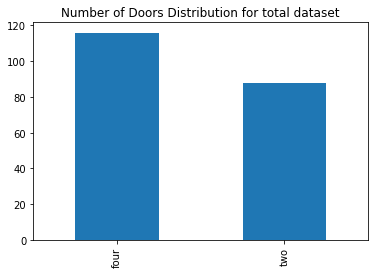

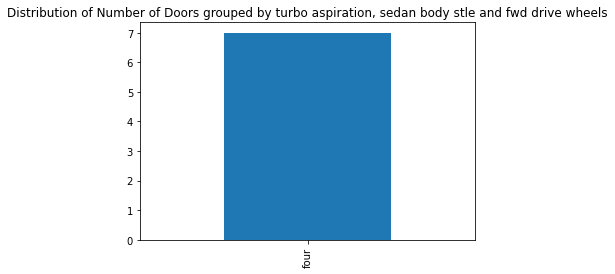

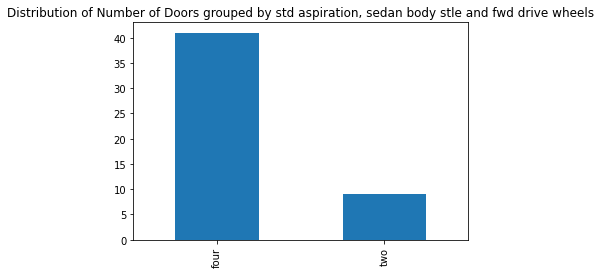

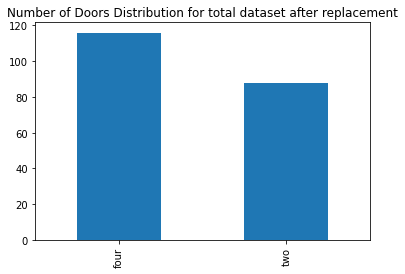

In [159]:
# Display distribtuion of 'Number of Doors' for entire dataset
data['Num of Doors'].value_counts().plot.bar()
plt.title('Number of Doors Distribution for total dataset')
plt.show()


# Display distribtuion of 'Number of Doors' for cars similar to car 26
data[(data.Aspiration == 'turbo') & (data['Body Style'] == 'sedan') & (data['Drive Wheels'] == 'fwd')]['Num of Doors'].value_counts().plot.bar()
plt.title('Distribution of Number of Doors grouped by turbo aspiration, sedan body stle and fwd drive wheels')
plt.show()
# Find mode of 'Number of Doors' for cars similar to car 26
mode_26 = str(data[(data.Aspiration == 'turbo') & (data['Body Style'] == 'sedan') & (data['Drive Wheels'] == 'fwd')]['Num of Doors'].mode())


data[(data.Aspiration == 'std') & (data['Body Style'] == 'sedan') & (data['Drive Wheels'] == 'fwd')]['Num of Doors'].value_counts().plot.bar()
plt.title('Distribution of Number of Doors grouped by std aspiration, sedan body stle and fwd drive wheels')
plt.show()
# Find mode of 'Number of Doors' for cars similar to car 62
mode_62 = str(data[(data.Aspiration == 'std') & (data['Body Style'] == 'sedan') & (data['Drive Wheels'] == 'fwd')]['Num of Doors'].mode())

# Manually input the mode of four into the 2 NaN values
# Note that the 2 NaN values have the same replacement of four doors
# Thus manually changing all NaN values to 'four' is sufficient, implementing the replacement algorithmically is not necessary
data['Num of Doors'] = data['Num of Doors'].fillna('four')

# Demonstrate the replacement for number of doors was successful
data.iloc[[26]]

# Display distribtuion of 'Number of Doors' for entire dataset after the replacement
data['Num of Doors'].value_counts().plot.bar()
plt.title('Number of Doors Distribution for total dataset after replacement')
plt.show()



In [163]:
#Replace '?'s in Price to np.nan
#data.replace({'Price': {'?': np.nan}}, regex=False,inplace=True)
# Convert 'Peak RPM' data from string to float
#data['Price'] = pd.to_numeric(data['Price'])

# Display observations with missing values for price
null_price = data[data['Price'].isnull()]
null_price

,Symboling,Normalized Losses,Make,Fuel Type,Aspiration,Num of Doors,Body Style,Drive Wheels,Engine Location,Wheel Base,Length,Width,Height,Curb Weight,Engine Type,Num of Cylinders,Engine Size,Fuel System,Bore,Stroke,Compression Ratio,Horsepower,Peak RPM,City MPG,Highway MPG,Price


In [121]:
print('The mean of Price in the original dataset is ' + str(data['Price'].mean()))
print('The median of Price in the original dataset is ' + str(data['Price'].median()))
print('The standard deviation of Price in the original dataset is ' + str(data['Price'].std()))

The mean of Price in the original dataset is 13205.69
The median of Price in the original dataset is 10270.0
The standard deviation of Price in the original dataset is 7966.982557988724


In [138]:
# Display the data of each make to see what we're working with
data[(data['Make'] == 'audi')]

,Symboling,Normalized Losses,Make,Fuel Type,Aspiration,Num of Doors,Body Style,Drive Wheels,Engine Location,Wheel Base,Length,Width,Height,Curb Weight,Engine Type,Num of Cylinders,Engine Size,Fuel System,Bore,Stroke,Compression Ratio,Horsepower,Peak RPM,City MPG,Highway MPG,Price
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.0
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.0
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250.0
5,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710.0
6,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920.0
7,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875.0
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,NaN


In [137]:
# Display the data of each make to see what we're working with
data[(data['Make'] == 'isuzu')]

,Symboling,Normalized Losses,Make,Fuel Type,Aspiration,Num of Doors,Body Style,Drive Wheels,Engine Location,Wheel Base,Length,Width,Height,Curb Weight,Engine Type,Num of Cylinders,Engine Size,Fuel System,Bore,Stroke,Compression Ratio,Horsepower,Peak RPM,City MPG,Highway MPG,Price
42,0,?,isuzu,gas,std,four,sedan,rwd,front,94.3,170.7,61.8,53.5,2337,ohc,four,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785.0
43,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,155.9,63.6,52.0,1874,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
44,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,155.9,63.6,52.0,1909,ohc,four,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
45,2,?,isuzu,gas,std,two,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,four,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048.0


In [136]:
# Display the data of each make to see what we're working with
data[(data['Make'] == 'porsche')]

,Symboling,Normalized Losses,Make,Fuel Type,Aspiration,Num of Doors,Body Style,Drive Wheels,Engine Location,Wheel Base,Length,Width,Height,Curb Weight,Engine Type,Num of Cylinders,Engine Size,Fuel System,Bore,Stroke,Compression Ratio,Horsepower,Peak RPM,City MPG,Highway MPG,Price
124,3,186,porsche,gas,std,two,hatchback,rwd,front,94.5,168.9,68.3,50.2,2778,ohc,four,151,mpfi,3.94,3.11,9.5,143,5500,19,27,22018.0
125,3,?,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528.0
126,3,?,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028.0
127,3,?,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028.0
128,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,NaN


In [150]:
# Replace the missing price values for each NaN with the mean of the price for its make
data['Price'] = data.groupby(['Make']).Price.transform(
    lambda x: x.fillna(x.mean()))

In [149]:
# Demonstrate that the replacement was successful
data.iloc[[8]]

,Symboling,Normalized Losses,Make,Fuel Type,Aspiration,Num of Doors,Body Style,Drive Wheels,Engine Location,Wheel Base,Length,Width,Height,Curb Weight,Engine Type,Num of Cylinders,Engine Size,Fuel System,Bore,Stroke,Compression Ratio,Horsepower,Peak RPM,City MPG,Highway MPG,Price
8,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,17859.166667


3. (15 Points) Consider the engine-size and stroke variables: Describe the specific feature scaling method 
you would apply to each of them. Then, using Python, generate both a histogram and a boxplot for the 
original content of these two variables. Next, apply your prescribed feature scaling methods to the two 
variables and create histograms and boxplots that show the results of your feature scaling efforts. 
Compare your newly created plots against the plots you created for the original content of the 
variables. Comment on whether your feature scaling efforts improved the distribution of the data. If 
your feature scaling efforts did not improve the distribution of the data, explain why you believe your 
efforts were not effective.

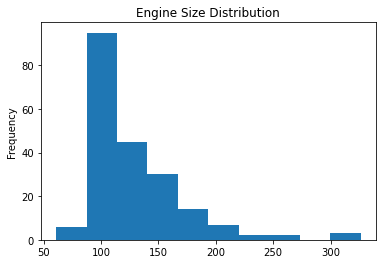

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


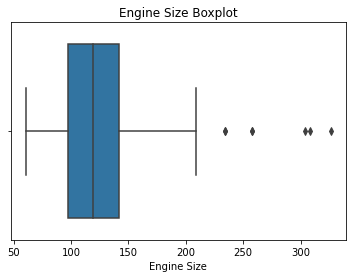

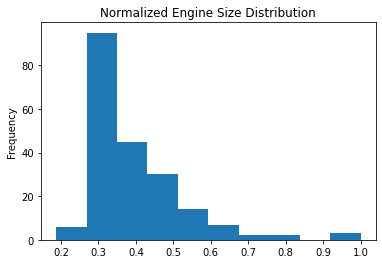

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


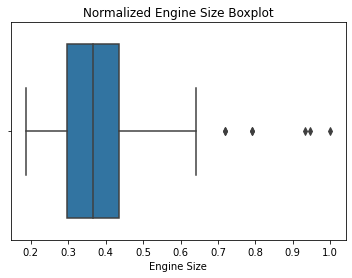

In [55]:
"""The Engine Size distribution is far from a Gaussian distribution so it would be most appropiate to normalize it. This is 
done by applying the following  formula 𝑋𝑛𝑜𝑟𝑚𝑎𝑙𝑖𝑧𝑒𝑑=(𝑋−𝑚𝑖𝑛(𝑋))/(𝑚𝑎𝑥(𝑋)−𝑚𝑖𝑛(𝑋)), this formula will transform all data 
values to fall within the range of  (0<=𝑋𝑛𝑜𝑟𝑚𝑎𝑙𝑖𝑧𝑒𝑑<=1) """
from sklearn import preprocessing

data['Engine Size'].plot.hist()
plt.title('Engine Size Distribution')
plt.show()

sns.boxplot(data['Engine Size'])
plt.title('Engine Size Boxplot')
plt.show()

#Use abs() and max() methods from the preprocessing library to simply the process of normalizing engine size
data['Engine Size'] = data['Engine Size'] /data['Engine Size'].abs().max()

#print the new normalized data sets' histogram and boxplot

data['Engine Size'].plot.hist()
plt.title('Normalized Engine Size Distribution')
plt.show()

sns.boxplot(data['Engine Size'])
plt.title('Normalized Engine Size Boxplot')
plt.show()


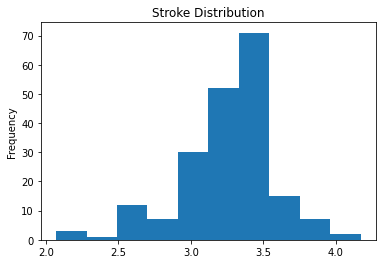

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


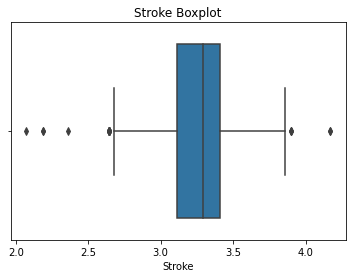

<ipython-input-56-53cd5a7d3455>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Stroke'][counter] = (point- data['Stroke'].mean())/data['Stroke'].std()


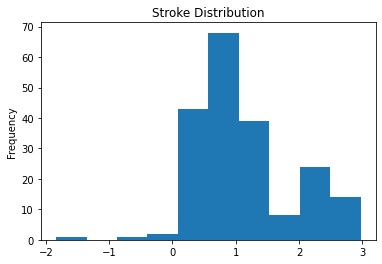

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


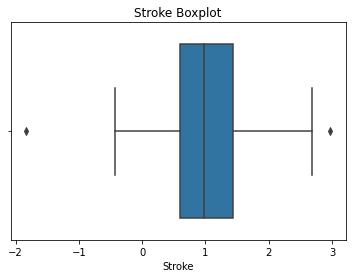

In [56]:
from sklearn import preprocessing
"""For the Stroke variable, we can see a slight resemblance to a Gaussian distribution so it would be most appropriate to
standardize the column as opposed to normalizing it."""
data['Stroke'].plot.hist()
plt.title("Stroke Distribution")
plt.show()

sns.boxplot(data['Stroke'])
plt.title('Stroke Boxplot')
plt.show()

#𝑥′=(𝑥−𝑚𝑒𝑎𝑛(𝑋))/𝑠𝑡𝑎𝑛𝑑𝑑𝑒𝑣(𝑋)  where  𝑋  represents the variable being standardized and  𝑥  represents a single data value within that variable.
#Apply the formula explained above to standardize the stroke data set manually 
counter = 0;
for point in data['Stroke']:
    data['Stroke'][counter] = (point- data['Stroke'].mean())/data['Stroke'].std()
    counter +=1
    

# print the standardized histogram and boxplot of stroke

data['Stroke'].plot.hist()
plt.title("Stroke Distribution")
plt.show()

sns.boxplot(data['Stroke'])
plt.title('Stroke Boxplot')
plt.show()


Unfortunately, when reflecting on the effects of normalizing the engine size and standardizing the stroke it seems as if there were no changes. The shapes reflected in both the boxplot and the histogram seem relatively identical. However, it is important to note that although we did not produce a normal distribution-shaped bar graph, we have successfully shaped the range of the data set to (0,1) for the engine size. For the Stroke, we have successfully scaled the data set to have a mean of zero and a standard deviation of 1. This is crucial when performing PCA which calculates a new projection of your data set. The new axis is based on the standard deviation of your variables so a high standard deviation will have a higher weight for the calculation of the axis than a variable with a low standard deviation. With scaled data, PCA calculates relevant axes since they all have the same standard deviation.

4. (15 Points) Consider the symboling, make, and engine-type variables:
A) For each variable, specify whether its content is numeric/continuous, numeric/discrete, 
categorical/nominal, or categorical/ordinal
B) For each variable, describe the methodology you would employ for purposes of preparing its data 
values for use within a machine learning algorithm.
C) Using your Python skills, apply your prescribed data preparation methodologies to the three 
variables. Be sure to show a sample of your results within you Jupyter Notebook.

4.

A) We consider symboling as an ordinal categorical variable, while make and engine type as nominal categorical.

B)To preprocess the symboling for machine learning algorithms we will apply the ordinal encoding transformation. For the
nominal categorical variables we will create new vectors of 'dummy variables' to make them usable within the machine 
learning environment.

0      4
1      3
2      3
3      3
4      3
      ..
199    1
200    1
201    1
202    1
203    1
Name: Symboling, Length: 204, dtype: int64


<ipython-input-57-f48d1451a2e3>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Symboling"][counter] = 4
<ipython-input-57-f48d1451a2e3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Symboling"][counter] = 3
<ipython-input-57-f48d1451a2e3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Symboling"][counter] = 3
<ipython-input-57-f48d1451a2e3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy o

<AxesSubplot:>

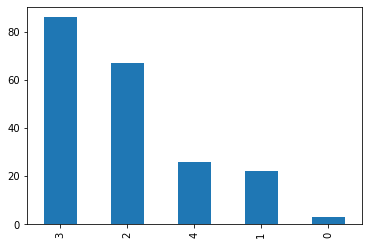

In [57]:
# manually alter symboling values to a scale of (0,4) for ordinal encoding
# Although the values were already ordered and numeric, they were firstly in string form and secondly started at -2. 
counter = 0
for val in data["Symboling"]:
    if val == -2:
          data["Symboling"][counter] = 0  
    if val == -1:
          data["Symboling"][counter] = 1 
    if val == 0:
          data["Symboling"][counter] = 2
    if val == 1:
          data["Symboling"][counter] = 3
    if val == 2:
          data["Symboling"][counter] = 3
    if val == 3:
          data["Symboling"][counter] = 4
    counter += 1
    
print(data['Symboling'])

data['Symboling'].value_counts().plot.bar()

In [58]:
#Used https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40 for reference help
# use the Pandas get_dummies() function to automatically generate dummy
# variables for each possible value of "make"
pd.get_dummies(data['Make'])
# merge the dummy variables with the original data
dummies = pd.get_dummies(data['Make'])
df_with_dummy = data[['Make']].join(dummies)
df_with_dummy

,Make,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,alfa-romero,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,alfa-romero,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,audi,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,audi,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,audi,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,volvo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
200,volvo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
201,volvo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
202,volvo,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [59]:
# use the Pandas get_dummies() function to automatically generate dummy
# variables for each possible value of "Engine Type"
pd.get_dummies(data['Engine Type'])
# merge the dummy variables with the original data

dummies = pd.get_dummies(data['Engine Type'])
df_with_dummy = data[['Engine Type']].join(dummies)
df_with_dummy

,Engine Type,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
0,dohc,1,0,0,0,0,0,0
1,ohcv,0,0,0,0,0,1,0
2,ohc,0,0,0,1,0,0,0
3,ohc,0,0,0,1,0,0,0
4,ohc,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
199,ohc,0,0,0,1,0,0,0
200,ohc,0,0,0,1,0,0,0
201,ohcv,0,0,0,0,0,1,0
202,ohc,0,0,0,1,0,0,0


5. (15 Points) Consider the wheel-base, length, width, height, curb-weight, engine-size, compressionratio, horsepower, peak-rpm, and city-mpg variables. Using your dimensionality reduction expertise, 
use Python to reduce the dimensionality of this group of variables to a set of new orthogonal features. 
Be sure to include appropriate commentary explaining the dimensionality reduction method you have 
elected to implement and discuss the results of your efforts. For example, you should explain how 
many orthogonal features your approach has generated as well as how much variability is explained by 
each of your new features.

We choose to use the principal components analysis (PCA) method so we can visualize our data and easily focus on the meaningful dimensions with the least variance. 

*Site references:*

*   https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
*   https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

Before we try to reduce the dimensionality we must first scale the data. This will allow us to do an "apples" to "apples" comparison of the dimensions and datapoints in addition to providing a successful PCA output. 

We will utilize the Sandard Scaler to scale the data.

In [61]:
import numpy as np
from sklearn.decomposition import PCA
import numpy as np
import warnings
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
import pandas

# which dimensions are we aiming to reduce?
dims = ['Wheel Base', 'Length', 'Width', 'Height', 'Curb Weight','Engine Size', 'Compression Ratio', 'City MPG' ]

# Separating the dimensions
x = data.loc[:, dims].values
# Standardizing the dimensions 
x = StandardScaler().fit_transform(x)

In [62]:
# Separating the Drive Wheels
y = data.loc[:,['Drive Wheels']].values

#we want the top ranked two components of the data with the greatest variance
# this will allow us to easily visualize our output in a two dimensional scatter plot
# this will also allow a ML algorithm to perform better as the dimensionality reduced signifigantly 
pca = PCA(n_components=2)
two = pca.fit_transform(x)
principalDf = pd.DataFrame(data = two
             , columns = ['principal component 1', 'principal component 2'])

In [63]:
print(principalDf)

     principal component 1  principal component 2
0                -1.393271              -1.990184
1                 0.173079              -1.259597
2                -0.026660               0.194643
3                 0.908968              -0.764532
4                 0.536553              -0.814635
..                     ...                    ...
199               2.482438               0.469387
200               2.737408               0.058502
201               3.063629              -0.164722
202               2.812201               2.781764
203               2.781189               0.184581

[204 rows x 2 columns]


In [69]:
finalDf = pd.concat([principalDf, data[['Drive Wheels']]], axis = 1)

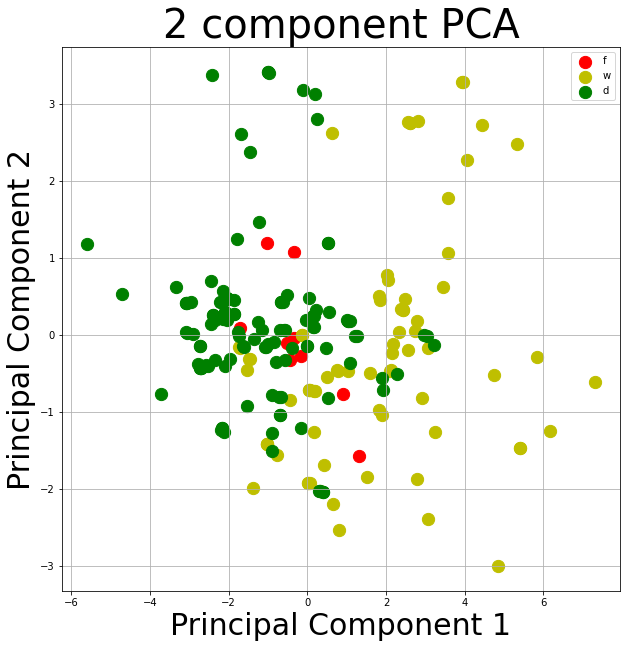

In [67]:
figure = plt.figure(figsize = (10,10))
ax = figure.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 30)
ax.set_ylabel('Principal Component 2', fontsize = 30)
ax.set_title('2 component PCA', fontsize = 40)
Drive_Wheels = ['4wd', 'rwd', 'fwd']
colors = ['r', 'y', 'g']
for Drive_Wheels, color in zip(Drive_Wheels,colors):
    indicesToKeep = finalDf['Drive Wheels'] == Drive_Wheels
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 150)
ax.legend(Drive_Wheels)
ax.grid()

We will use the explained variance ratio to understand the percentage of variance that is attributed by the two principal components. Ideally we want to reach a total of about 0.8 or 80% to avoid overfitting.

Source: 
https://towardsdatascience.com/dealing-with-highly-dimensional-data-using-principal-component-analysis-pca-fea1ca817fe6

In [70]:
pca.explained_variance_ratio_

array([0.61023414, 0.18986211])

Our output provides two new orthogonal features. The variability for the two new features is provided above .61 for the first component and .19 for the second component. This means that together the two contain 80% of the original information.